<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M6_AI3_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Ground Truth: 5


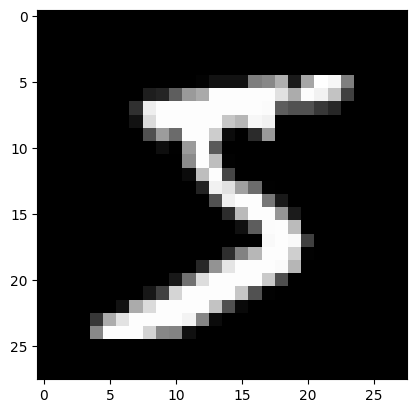

In [4]:
plt.imshow(x_train[0], cmap='gray')
print('Ground Truth: %s'%(y_train[0]))

Ground Truth: 2


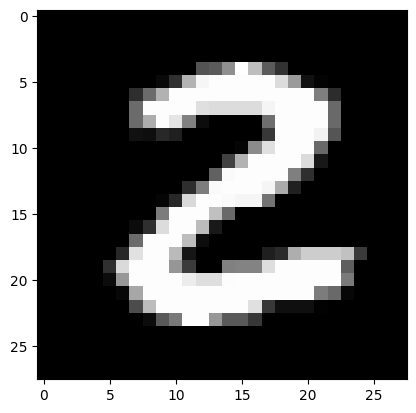

In [5]:
plt.imshow(x_train[25], cmap='gray')
print('Ground Truth: %s'%(y_train[25]))

Ground Truth: 8


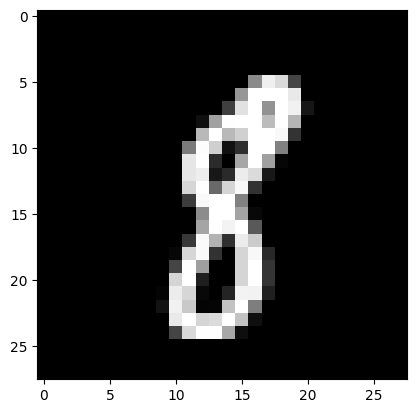

In [6]:
plt.imshow(x_train[300], cmap='gray')
print('Ground Truth: %s'%(y_train[300]))

In [7]:
# Normalización de los datos a un rango de 0 a 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# Conversión de 3D-Array a 2D-Array
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

n_train = 600
x_train1 = x_train[0:n_train]
y_train1 = y_train[0:n_train]

In [10]:
x_train1.shape

(600, 784)

In [11]:
model = RandomForestClassifier()
model.fit(x_train1, y_train1)

RandomForestClassifier()

In [12]:
# precting the model
y_pred = model.predict(x_test)
model.score(x_test, y_test)
accuracy_score(y_pred, y_test)

0.8536

In [13]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       980
           1       0.90      0.97      0.93      1135
           2       0.85      0.84      0.84      1032
           3       0.87      0.83      0.85      1010
           4       0.81      0.85      0.83       982
           5       0.81      0.73      0.77       892
           6       0.90      0.83      0.86       958
           7       0.90      0.88      0.89      1028
           8       0.89      0.76      0.82       974
           9       0.75      0.85      0.80      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



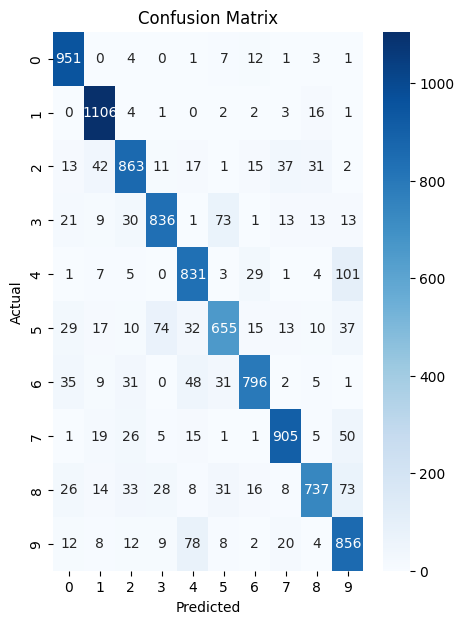

In [14]:
# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

In [15]:
# Definir la rejilla de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 200}


In [16]:
# Predecir y evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [17]:
# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



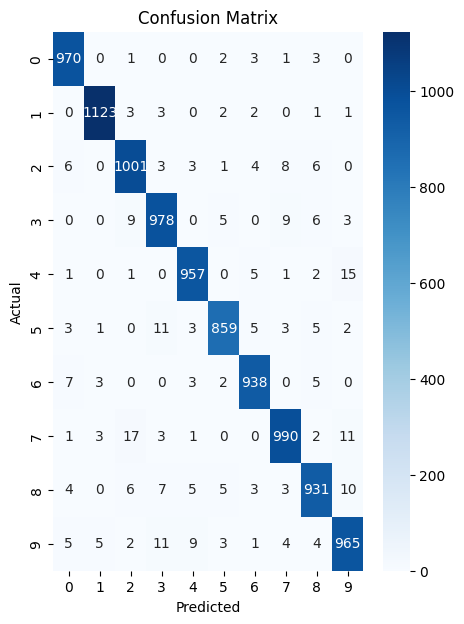

In [18]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()